#Trabajo Práctico Nº 4
Análisis sobre datasets

##Consignas

1- Buscar los siguientes data set en la web
* Titanic
* Iris
* Wine
* Indian Diabetes

2- Explicar de cada data set, sus diferente *variables*

3- Decide justificando tu respuesta que tipo de categoria de variable son

4- Detectar y arreglar los siguientes conceptos

* Valores Ausentes
* Valores Atipicos

5- De los diferentes data set, se puede eliminar alguna columna

6- Realizar análisis univariados

* Gráfico de frecuencia
* Gráfico de torta
* Histograma

7- En base a los gráficos del punto 6 realizar distintas concluciones

8- Realizar análisis de correlación y explicar que variables están correlacionadas


##Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data set Titanic

In [2]:
# crear el DataFrame
url = 'https://raw.githubusercontent.com/ezpeletense/AP-ciencia-datos/master/datasets/titanic3.xls'

titanic = pd.read_excel(url, engine="xlrd")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Variables del Dataset Titanic
El dataset *Titanic* cuenta con 14 columnas, podemos ordenar las variables que representan del siguiente modo:

### Variables Ordinales
- **pclass**: Representa la clase de pasajero en el Titanic.

### Variables Nominales
- **survived**: Indica si un pasajero sobrevivió o no al naufragio.
- **name**: Nombres de los pasajeros.
- **sex**: Género de los pasajeros.
- **ticket**: Número de boleto.
- **cabin**: Número de cabina.
- **embarked**: Puerto de embarque.
- **boat**: Número de bote salvavidas.
- **home.dest**: Lugar de destino.

### Variables Numéricas Continuas
- **age**: Edad de los pasajeros.
- **fare**: Tarifa del boleto.

### Variables Numéricas Discretas
- **sibsp**: Número de hermanos o cónyuges a bordo.
- **parch**: Número de padres o hijos a bordo.
- **body**: Número de identificación del cuerpo.


### Valores ausentes y valores atípicos

In [5]:
# detectar los valores ausentes
valores_ausentes = titanic.isnull().sum()

# mostrar la suma de valores ausentes en cada columna
print(valores_ausentes)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Se decide eliminar la columna 'body' del dataset por contener mayoritariamente valores ausentes. Para la columna 'cabin' se reemplazan los valore ausentes con la cadena "Unknown".

In [6]:
# eliminar la columna 'body'
titanic = titanic.drop(columns=['body'])

# reemplazar valores ausentes en 'cabin' con "Unknown"
titanic['cabin'] = titanic['cabin'].fillna("Unknown")

# mostrar el DataFrame actualizado
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
# detectar valores atípicos usando el rango intercuartil (IQR)
Q1 = titanic.quantile(0.25, numeric_only=True)
Q3 = titanic.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# definir los límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = (titanic < limite_inferior) | (titanic > limite_superior)

valores_atipicos.head()

<ipython-input-7-d9cb5f3d736c>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  valores_atipicos = (titanic < limite_inferior) | (titanic > limite_superior)


,age,boat,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
0,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,False,False,False


### Análisis univariados

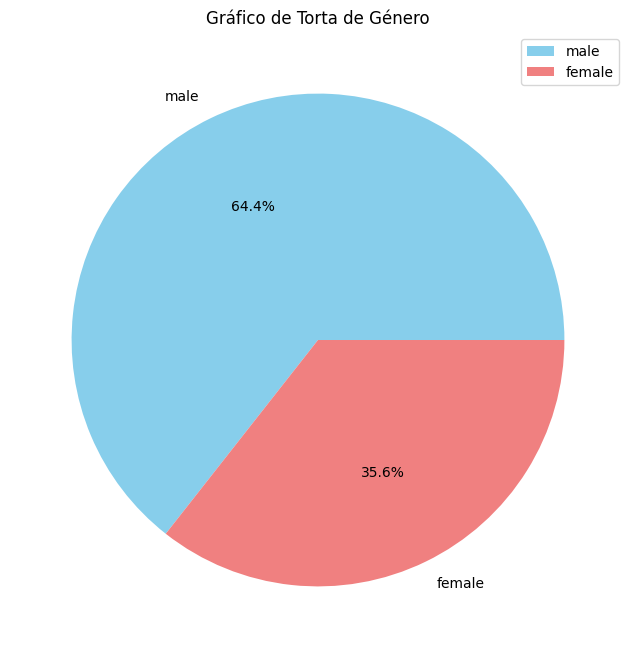

In [ ]:
# gráfico de torta para 'sex'
plt.figure(figsize=(8, 8))
pie_data = titanic['sex'].value_counts()
pie_chart = pie_data.plot(kind='pie', autopct='%1.1f%%',
                          colors=['skyblue', 'lightcoral'])

# personalizar labels
plt.title('Gráfico de Torta de Género')
plt.ylabel('')
plt.legend(labels=pie_data.index, loc='upper right')

plt.show()

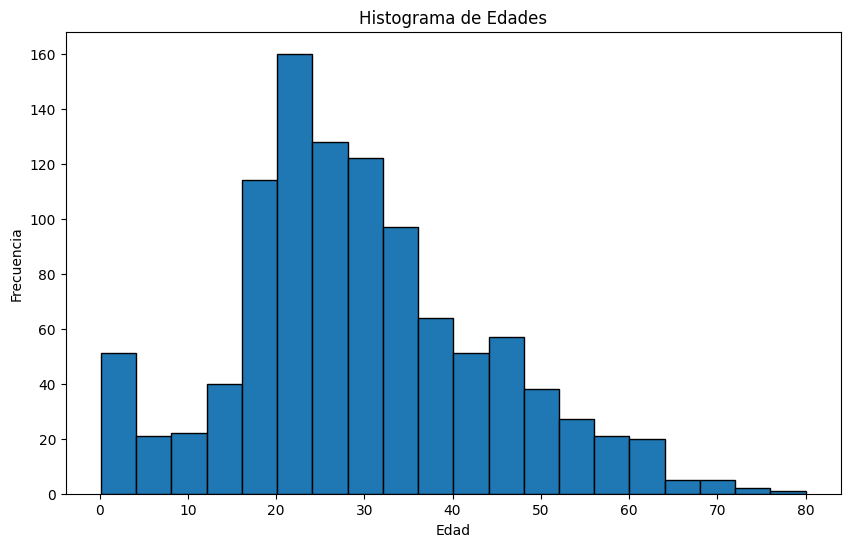

In [ ]:
# gráfico de frecuencia (histograma)
plt.figure(figsize=(10, 6))
plt.hist(titanic['age'].dropna(), bins=20, edgecolor='black')

# personalizar labels
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

plt.show()

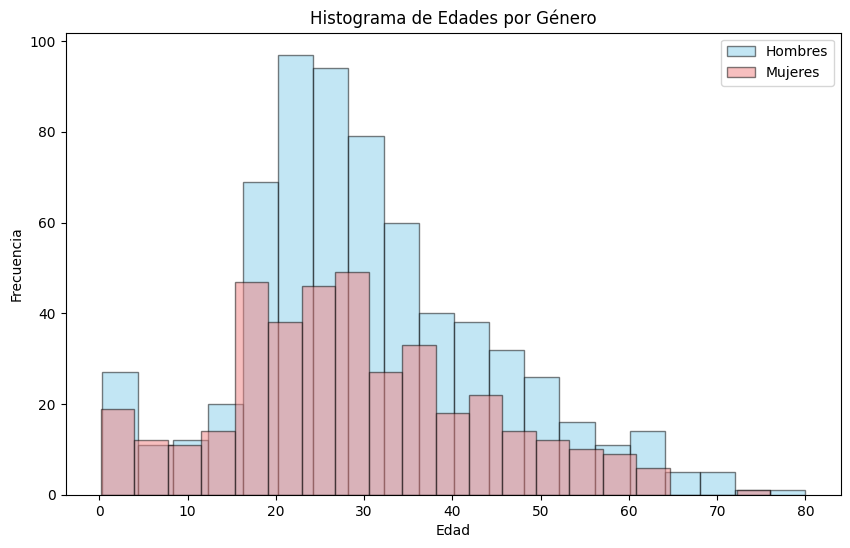

In [ ]:
# filtrar edades por género
edades_hombres = titanic[titanic['sex'] == 'male']['age'].dropna()
edades_mujeres = titanic[titanic['sex'] == 'female']['age'].dropna()

# gráfico de frecuencia (histograma)
plt.figure(figsize=(10, 6))

# histograma para edades de hombres
plt.hist(edades_hombres, bins=20, edgecolor='black',
         color='skyblue', alpha=0.5, label='Hombres')

# histograma para edades de mujeres
plt.hist(edades_mujeres, bins=20, edgecolor='black',
         color='lightcoral', alpha=0.5, label='Mujeres')

# personalizar labels
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades por Género')
plt.legend()

plt.show()

### Análisis de correlación

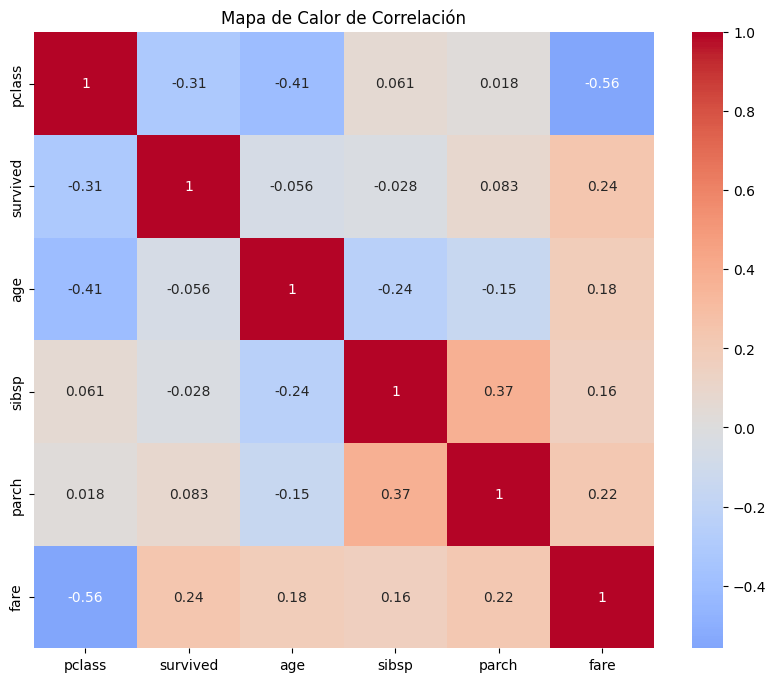

In [ ]:
# calcular la matriz de correlación
matriz = titanic.corr(numeric_only=True)

# crear un mapa de calor de la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación')

plt.show()

El mapa de calor muestra algunas correlaciones que podrían explorarse. Por ejemplo:

- Entre 'pclass' y 'fare' hay una correlación negativa esperable, los pasajeros de clases altas pagaron más por sus pasajes.
- Entre 'pclass' y 'survived' existe una correlación moderada que podría indicar una mayor probabilidad de supervivencia entre aquellas personas de las clases altas.
- Entre 'survived' y 'age', 'sibsp' y 'parch' no se observan correlaciones significativas por lo que podría decirse que la edad y el número de familiares a bordo no influirían en la probabilidad de supervivencia.